In [1]:
'''
Market Basket Analysis: Apriori Algorithm 
Dataset: Order2.csv 
This dataset comprises the list of transactions of a retail company over the period of one week. 
It contains a total of 7501 transaction records where each record consists of the list of items sold in one transaction. 
Using this record of transactions and items in each transaction, find the association rules between items. 
There is no header in the dataset and the first row contains the first transaction, 
so mentioned header = None here while loading dataset. 
Follow following steps: 
a. Data Pre-processing 
b. Generate the list of transactions from the dataset 
c. Train Apriori algorithm on the dataset 
d. Visualize the list of rules 
'''

'\nMarket Basket Analysis: Apriori Algorithm \nDataset: Order2.csv \nThis dataset comprises the list of transactions of a retail company over the period of one week. \nIt contains a total of 7501 transaction records where each record consists of the list of items sold in one transaction. \nUsing this record of transactions and items in each transaction, find the association rules between items. \nThere is no header in the dataset and the first row contains the first transaction, \nso mentioned header = None here while loading dataset. \nFollow following steps: \na. Data Pre-processing \nb. Generate the list of transactions from the dataset \nc. Train Apriori algorithm on the dataset \nd. Visualize the list of rules \n'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [29]:
# load dataset with no headers
data = pd.read_csv(r'LP-1_Dataset\Apriori\Order2.csv', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [31]:
# convert data to a list of transactions
transactions = []
for i in range(len(data)):
    transaction = data.iloc[i].dropna().tolist()
    transactions.append(transaction)

In [32]:
# convert list of transaction to one-hot encoded format
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_array, columns=te.columns_)

In [33]:
frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)

In [34]:
print(rules)

                    antecedents      consequents  antecedent support  \
0                     (avocado)  (mineral water)            0.033329   
1                     (burgers)           (eggs)            0.087188   
2                     (burgers)   (french fries)            0.087188   
3                     (burgers)      (green tea)            0.087188   
4                     (burgers)           (milk)            0.087188   
..                          ...              ...                 ...   
157           (spaghetti, milk)  (mineral water)            0.035462   
158  (mineral water, olive oil)      (spaghetti)            0.027596   
159      (olive oil, spaghetti)  (mineral water)            0.022930   
160   (mineral water, pancakes)      (spaghetti)            0.033729   
161       (pancakes, spaghetti)  (mineral water)            0.025197   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.238368  0.011598    0.348000  1.45992

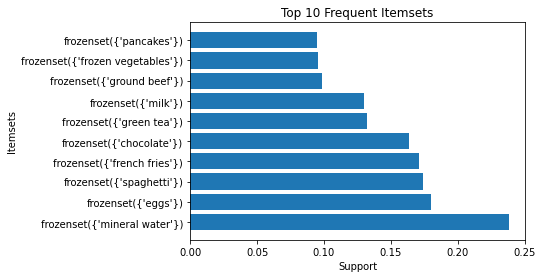

In [35]:
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
plt.barh(frequent_itemsets['itemsets'].head(10).astype(str), frequent_itemsets['support'].head(10))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()

([<matplotlib.axis.YTick at 0x288bc243700>,
 [Text(0, 0, 'ground beef, eggs -> mineral water'),
  Text(0, 1, 'ground beef, milk -> mineral water'),
  Text(0, 2, 'ground beef, chocolate -> mineral water'),
  Text(0, 3, 'frozen vegetables, milk -> mineral water'),
  Text(0, 4, 'soup -> mineral water'),
  Text(0, 5, 'pancakes, spaghetti -> mineral water'),
  Text(0, 6, 'olive oil, spaghetti -> mineral water'),
  Text(0, 7, 'spaghetti, milk -> mineral water'),
  Text(0, 8, 'chocolate, milk -> mineral water'),
  Text(0, 9, 'spaghetti, ground beef -> mineral water')])

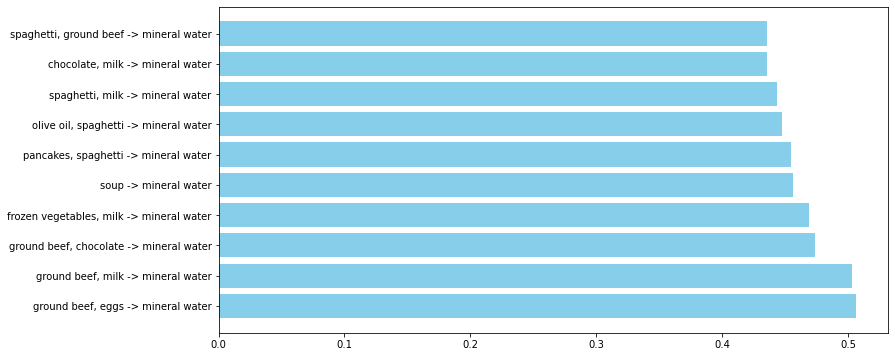

In [36]:
# sort rules by confidence in descending order to get the top itemsets
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='skyblue')
plt.yticks(range(len(top_confidence_rules)), [f"{', '.join(list(a))} -> {', '.join(list(c))}"
                                             for a, c in zip(top_confidence_rules['antecedents'],
                                                            top_confidence_rules['consequents'])])